In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])
df.sample(5)

,Survived,Age,Fare
535,1,7.0,26.2500
128,1,NaN,22.3583
90,0,29.0,8.0500
505,0,18.0,108.9000
788,1,1.0,20.5750


In [3]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
x = df.drop(columns =['Survived'])
y = df['Survived']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 2)

In [6]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [7]:
# here we creating the new columns checking befor impuation and after impuation
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [8]:
x_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [9]:
# here in the data we replacing the nan values with the random values in the train data 
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values 
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15776\94870347.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
C:\U

In [10]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]

Series([], Name: Age_imputed, dtype: float64)

In [11]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([22.  , 27.  , 21.  , 62.  , 39.  , 31.  , 41.  , 16.  , 59.  ,
       58.  , 22.  ,  8.  , 27.  , 37.  , 26.  ,  2.  , 30.  , 48.  ,
       63.  ,  0.42, 42.  , 18.  ,  2.  ,  2.  , 42.  , 25.  , 36.  ,
       14.  , 44.  ,  5.  , 19.  , 33.  , 22.  , 24.  , 22.  , 18.  ,
       29.  , 49.  , 29.  , 28.  , 50.  , 44.  , 27.  , 16.  , 15.  ,
       35.  , 44.  , 32.  , 41.  , 32.5 , 30.5 , 32.  , 47.  , 30.  ,
       44.  , 26.  , 28.  , 36.  ,  4.  ,  6.  ,  0.75, 42.  , 50.  ,
       27.  , 28.  , 31.  , 24.  , 20.  , 71.  , 26.  , 31.  , 45.  ,
       40.  , 20.  , 30.  , 33.  ,  3.  , 35.  , 30.  , 33.  , 33.  ,
       50.  , 23.  , 20.  , 22.  , 30.  , 26.  ,  5.  , 24.  , 36.  ,
       16.  , 28.  , 14.5 , 26.  , 47.  , 36.  , 58.  , 27.  , 28.  ,
       31.  , 31.  , 70.  , 33.  , 24.  , 25.  , 13.  , 40.  , 22.  ,
       35.  , 49.  , 42.  ,  0.83, 22.  , 36.  , 26.  , 19.  , 31.  ,
       22.  , 22.  , 25.  , 17.  ,  4.  , 51.  , 34.  , 54.  , 38.  ,
       28.  , 52.  ,

In [12]:
x_train['Age'].isnull().sum()

148

In [13]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,4.0
493,71.0,49.5042,71.0
527,NaN,221.7792,32.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15776\4157976961.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label ='Original',hist=False)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15776\4157976961.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['

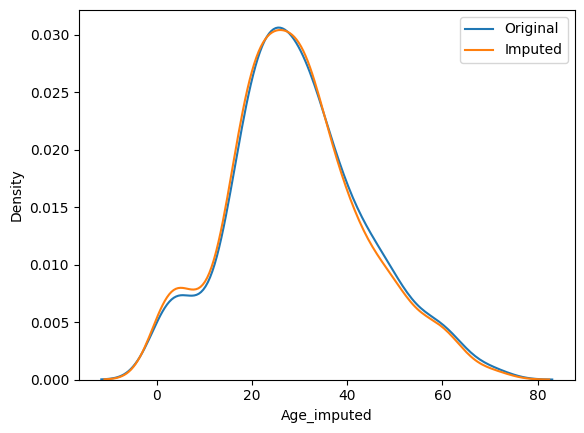

In [14]:
sns.distplot(x_train['Age'],label ='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist = False)

plt.legend()
plt.show()

In [15]:
print('original variable variance :',x_train['Age'].var())
print('Variance after random imputation :',x_train['Age_imputed'].var())

original variable variance : 204.3495133904614
Variance after random imputation : 200.85026679131286


In [16]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,63.583534
Age,71.512440,204.349513,204.349513
Age_imputed,63.583534,204.349513,200.850267


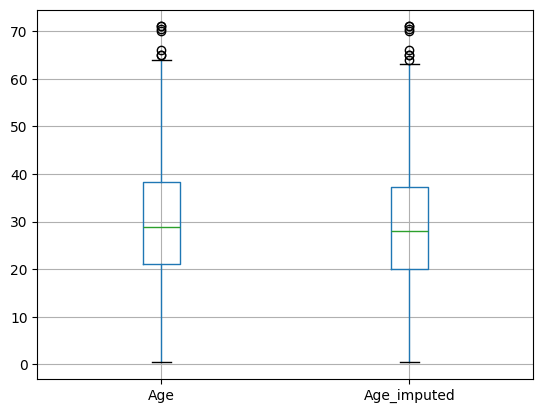

In [17]:
# now we ploting the box plot in theis 
x_train[['Age','Age_imputed']].boxplot()
plt.show()

In [18]:
observation = {'Fare': 712}
sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

print(sampled_value)


638    41.0
Name: Age, dtype: float64


In [19]:
x_train.shape

(712, 3)

In [20]:
# here above the bouth lines is same in x_train data 
sampled_value = x_train['Age'].dropna().sample(1,random_state =int(observation['Fare']))

In [21]:
sampled_value

638    41.0
Name: Age, dtype: float64

# for catorgial

In [22]:
# from this we working with the catorgial data in the dataframe 
data = pd.read_csv('house-train.csv',usecols = ['GarageQual','FireplaceQu','SalePrice'])
data.sample(5)

,FireplaceQu,GarageQual,SalePrice
796,TA,TA,143500
534,Gd,TA,178000
490,Gd,TA,115000
1424,TA,TA,144000
77,NaN,TA,127000


In [23]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [24]:
x = data
y = data['SalePrice']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =2)

In [26]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [27]:
x_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [28]:
x_test.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
503,TA,TA,289000,TA,TA
101,TA,TA,178000,TA,TA
608,Gd,TA,359100,TA,Gd
1089,Gd,TA,197000,TA,Gd
819,Gd,TA,224000,TA,Gd


In [29]:
x_train.isnull().mean()*100

FireplaceQu            47.688356
GarageQual              5.565068
SalePrice               0.000000
GarageQual_imputed      5.565068
FireplaceQu_imputed    47.688356
dtype: float64

In [30]:
# here in the data we replacing the nan values with the random values in the train data 
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values 
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15776\1239607879.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual

In [31]:
temp = pd.concat([
    x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),  # it is frquance in the data 
    x_train['GarageQual_imputed'].value_counts() / len(x_train)
],axis = 1)

temp.columns = ['original','imputed']

In [32]:
temp

,original,imputed
TA,0.951043,0.948630
Fa,0.037171,0.038527
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.001712


In [33]:
temp = pd.concat([
    x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),  # it is frquance in the data 
    x_train['FireplaceQu_imputed'].value_counts() / len(x_train)
],axis = 1)

temp.columns = ['original','imputed']

In [34]:
temp

,original,imputed
Gd,0.494272,0.485445
TA,0.412439,0.417808
Fa,0.040917,0.041952
Po,0.027823,0.029110
Ex,0.024550,0.025685


In [37]:
x_train['FireplaceQu'].value_counts()
# here we 5 diff category in this columns 

FireplaceQu
Gd    302
TA    252
Fa     25
Po     17
Ex     15
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15776\557296774.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15776\557296774.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

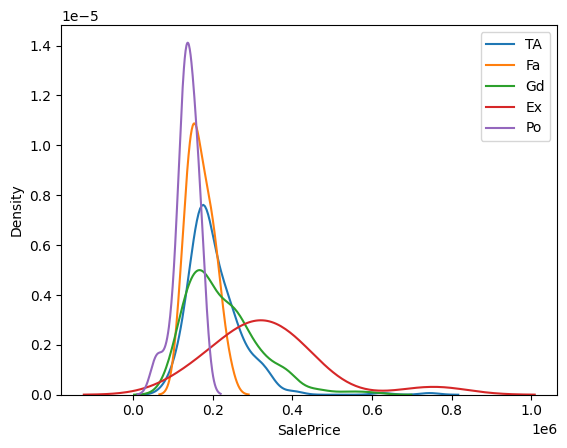

In [42]:
# Remove the parentheses after dropna and unique
# Befor impuation in the dataframe 
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)

plt.legend()

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15776\3297112575.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'], hist=False, label=category)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15776\3297112575.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

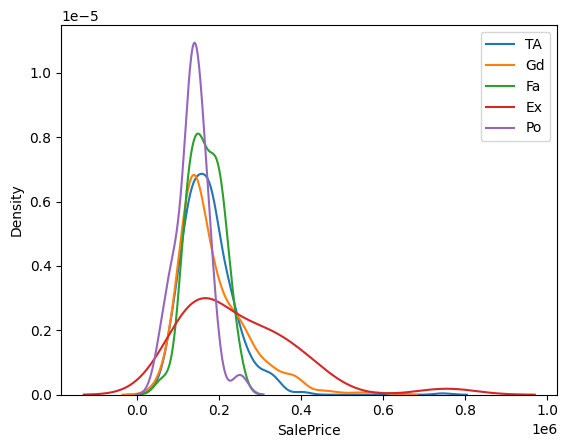

In [46]:
# After imputation in the datafram
# Remove the parentheses after dropna and unique
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'], hist=False, label=category)

plt.legend()

plt.show() 
# here it change the data distubation 